In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

In [103]:
def img_to_df(path):
    data_arr = []
    label = []
    for category in os.listdir(path):
        catdir = os.path.join(path, category)
        for img in os.listdir(catdir):
            imgdir = os.path.join(catdir, img)
            img_arr = cv2.imread(imgdir, cv2.IMREAD_GRAYSCALE) # 28 x 28
            img_flat = np.ravel(img_arr)
            data_arr.append(img_flat)
            label.append(int(category))
    df = pd.DataFrame(data_arr)
    
    df['label'] = label
    return df

In [104]:
train_path = "data/train/"
val_path = "data/val/"
test_path = "data/test/"

train = img_to_df(train_path).sample(frac=1).reset_index(drop=True)
val = img_to_df(val_path).sample(frac=1).reset_index(drop=True)
test = img_to_df(test_path).sample(frac=1).reset_index(drop=True)

In [105]:
train.to_csv('train.csv')
val.to_csv('val.csv')
test.to_csv('test.csv')

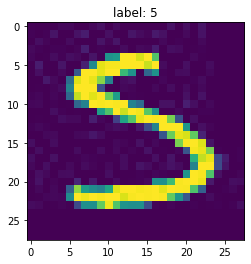

In [106]:
plt.imshow(np.array(test.iloc[19, :-1], dtype='uint8').reshape((28, 28)))
plt.title(f'label: {test.label[19]}')
plt.show()

In [107]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le = le.fit(train.label)

train.label = le.transform(train.label)
val.label = le.transform(val.label)
test.label = le.transform(test.label)

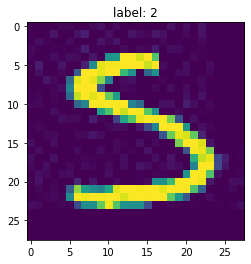

In [108]:
sample_img = np.array(test.iloc[19, :-1], dtype='uint8').reshape((28, 28))
plt.imshow(sample_img)
plt.title(f'label: {test.label[19]}')
plt.show()